## **Titanic_Analysis**

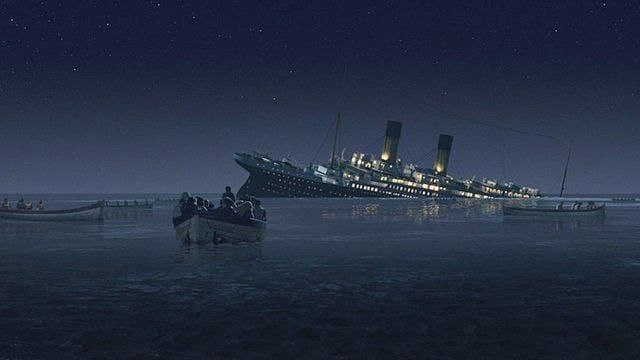

**Data Pre_processing & EDA**

Import libraires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

load_titanic_dataset

In [ ]:
tit = sns.load_dataset('titanic')

In [ ]:
tit.head(10).style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True
5,0,3,male,nan,0,0,8.458300,Q,Third,man,True,nan,Queenstown,no,True
6,0,1,male,54.000000,0,0,51.862500,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.000000,3,1,21.075000,S,Third,child,False,nan,Southampton,no,False
8,1,3,female,27.000000,0,2,11.133300,S,Third,woman,False,nan,Southampton,yes,False
9,1,2,female,14.000000,1,0,30.070800,C,Second,child,False,nan,Cherbourg,yes,False


In [ ]:
tit.tail().style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.000000,S,Second,man,True,nan,Southampton,no,True
887,1,1,female,19.000000,0,0,30.000000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,nan,1,2,23.450000,S,Third,woman,False,nan,Southampton,no,False
889,1,1,male,26.000000,0,0,30.000000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.750000,Q,Third,man,True,nan,Queenstown,no,True


In [ ]:
tit.shape

(891, 15)

In [ ]:
tit.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# display the data types and check if there are columns contain nulls
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# display the descriptive statistics
tit.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Dealing with missing values**

In [ ]:
# count nulls in each column
tit.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


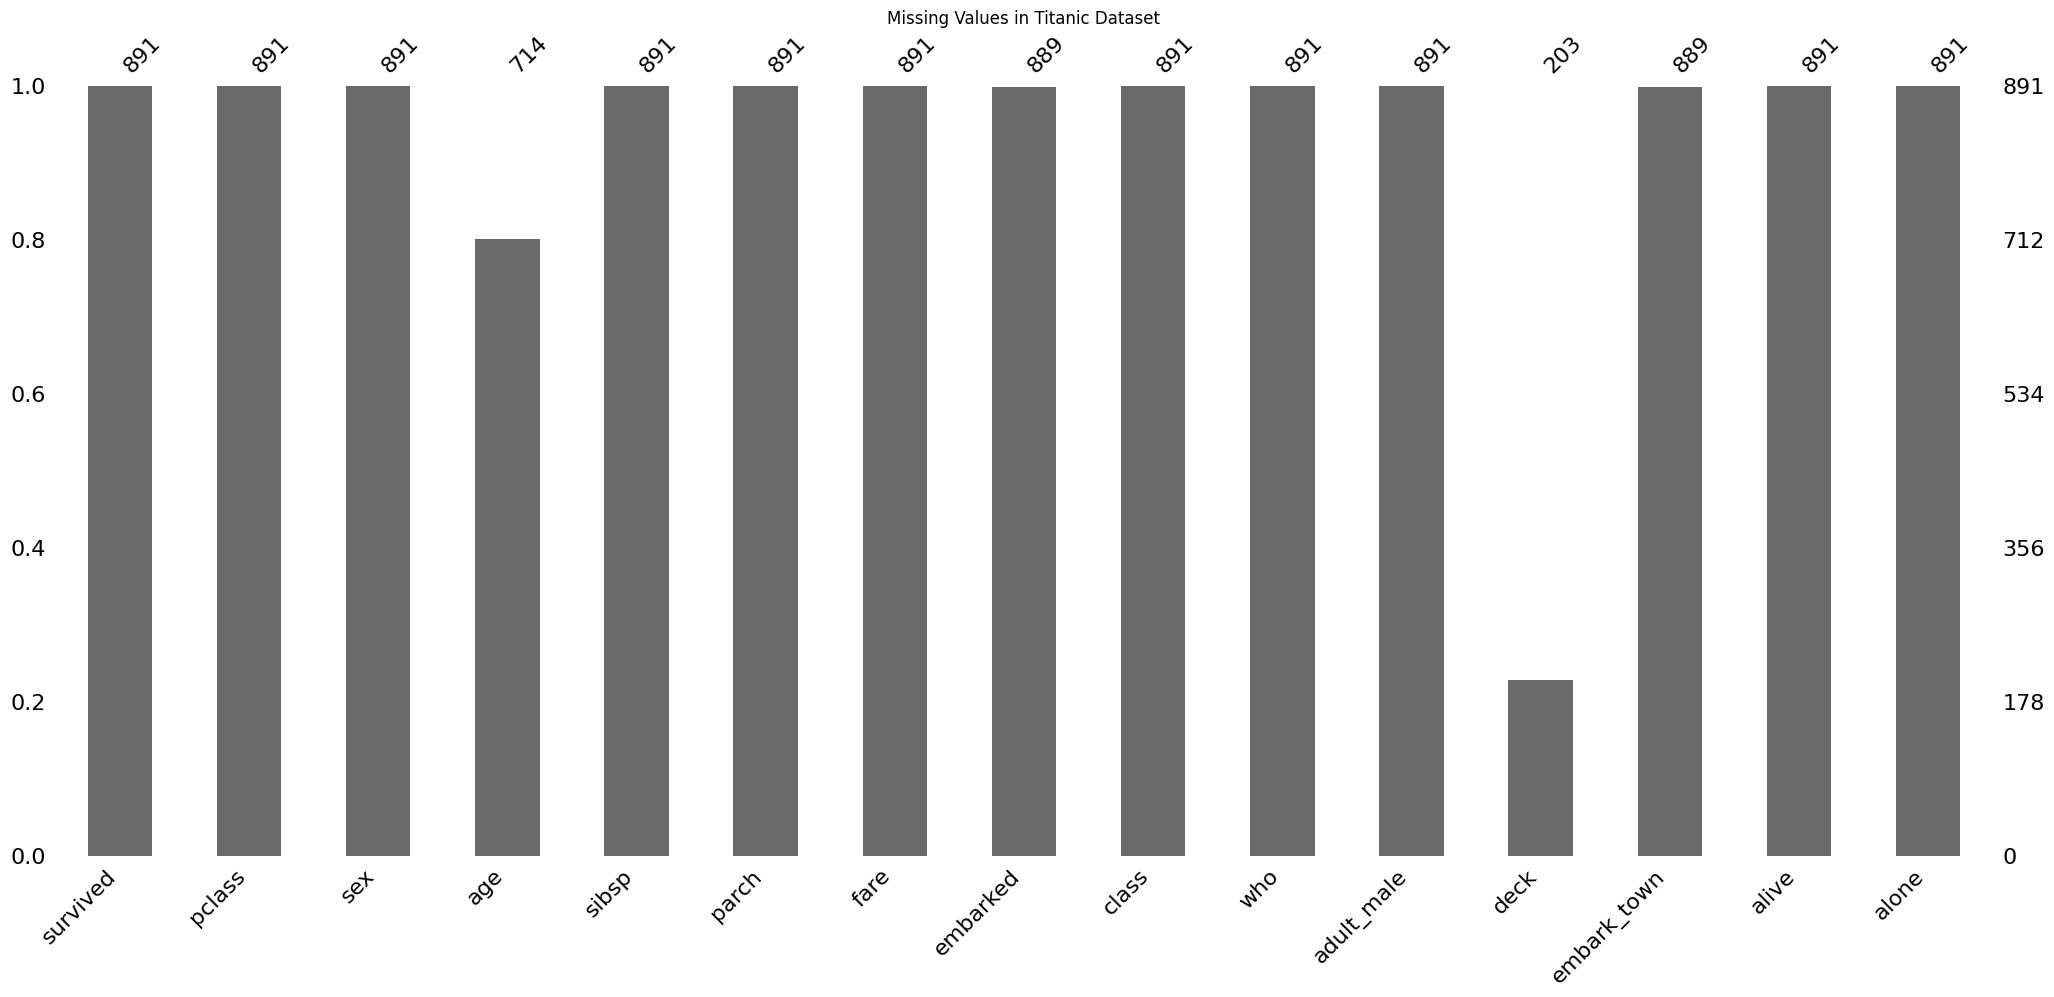

In [ ]:
# visula count of nulls in each column
plt.figure(figsize=(8,5))
msno.bar(tit).set(title='Missing Values in Titanic Dataset')
plt.show()

**Dealing with nulls in embarked and embark_twon featuers**

In [ ]:
tit[tit['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
tit['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
# fill nulls with most frequency
tit['embarked'].fillna('S', inplace=True)

In [ ]:
tit['embarked'].isna().sum()

0

In [ ]:
tit['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [ ]:
# fill nulls with most frequency
tit['embark_town'].fillna('Southampton', inplace=True)

In [ ]:
tit['embark_town'].isna().sum()

0

**Dealing with nulls in "age" column**

In [ ]:
# count of nulls
tit['age'].isna().sum()

177

In [ ]:
tit[tit['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


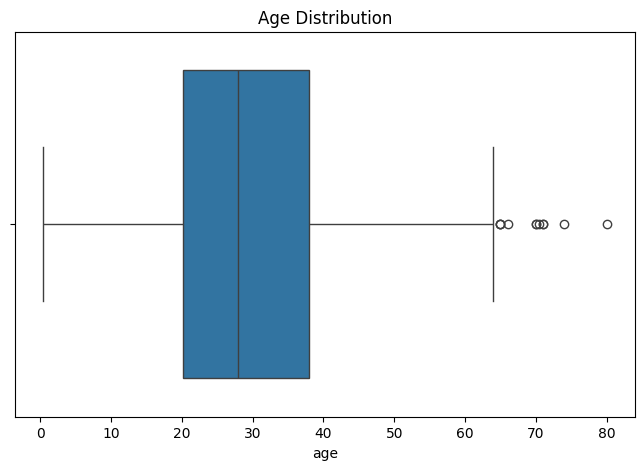

In [ ]:
# check if age feature contain outliers
plt.figure(figsize=(8,5))
sns.boxplot(x = tit['age']).set(title='Age Distribution')
plt.show()

In [ ]:
mean = tit['age'].median()
median = tit['age'].mean(skipna = True).round(2)
print(" the avg _without_nulls = ", mean)
print(" the median = " , median)

 the avg _without_nulls =  28.0
 the median =  29.7


In [ ]:
tit['age'].fillna(tit['age'].median(), inplace=True)

In [ ]:
tit['age'].isna().sum()

0

Dealing with nulls in "deck" feature

> deck: The deck where the passenger's cabin was located. Many values are missing.


In [ ]:
tit['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
tit['deck'].isna().sum()

688

In [ ]:
# Percentage of nulls in "deck" feature
tit['deck'].isna().mean() * 100

77.21661054994388

In [ ]:
tit.drop(columns='deck', inplace=True)

In [ ]:
tit.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# **Dealing With duplicated data**

> Duplicate data refers to exact copies of database records within a network


In [ ]:
# count duplicates
tit.duplicated().sum()

116

In [ ]:
# display duplicated records
tit[tit.duplicated()].sort_values(by='fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
466,0,2,male,28.0,0,0,0.00,S,Second,man,True,Southampton,no,True
815,0,1,male,28.0,0,0,0.00,S,First,man,True,Southampton,no,True
481,0,2,male,28.0,0,0,0.00,S,Second,man,True,Southampton,no,True
413,0,2,male,28.0,0,0,0.00,S,Second,man,True,Southampton,no,True
674,0,2,male,28.0,0,0,0.00,S,Second,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.55,S,Third,man,True,Southampton,no,False
792,0,3,female,28.0,8,2,69.55,S,Third,woman,False,Southampton,no,False
863,0,3,female,28.0,8,2,69.55,S,Third,woman,False,Southampton,no,False
324,0,3,male,28.0,8,2,69.55,S,Third,man,True,Southampton,no,False


In [ ]:
tit.drop_duplicates(keep='last', inplace=True)

In [ ]:
# check if still duplicates in dataset
tit.duplicated().sum()

0

# **Dealing with outliers**

> outlier is a data point that differs significantly from other observations.


In [ ]:
tit.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,775.00,775.00,775.00,775.00,775.00,775.00
mean,0.41,2.25,29.58,0.53,0.42,34.88
std,0.49,0.85,13.77,0.99,0.84,52.41
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,1.00,21.00,0.00,0.00,8.05
50%,0.00,3.00,28.00,0.00,0.00,15.90
75%,1.00,3.00,36.00,1.00,1.00,34.20
max,1.00,3.00,80.00,8.00,6.00,512.33


using boxplot to check if data contain outliers or not

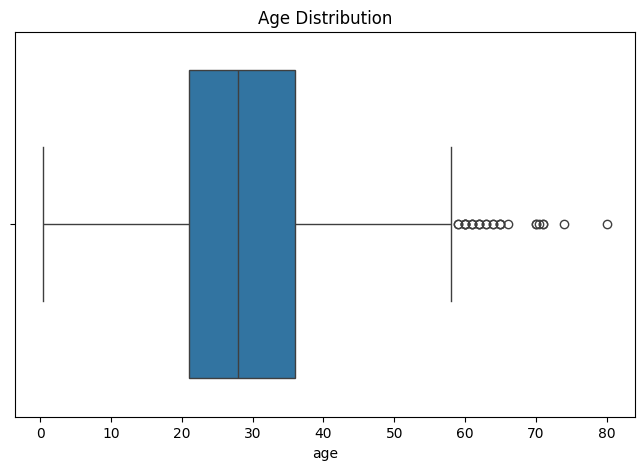

In [ ]:
# age
plt.figure(figsize=(8,5))
sns.boxplot(x = tit['age']).set(title='Age Distribution')
plt.show()

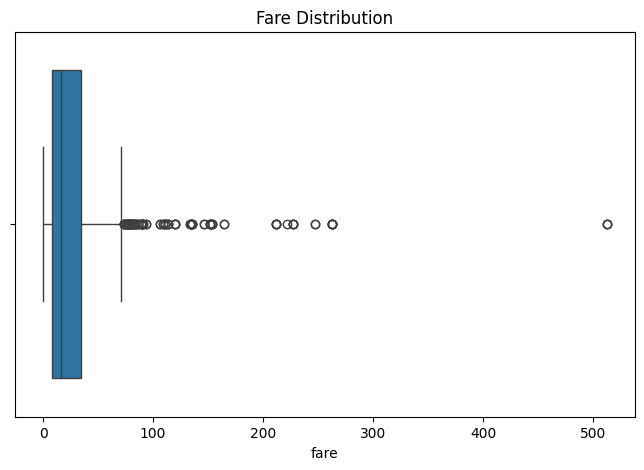

In [ ]:
# fare
plt.figure(figsize=(8,5))
sns.boxplot(x = tit['fare']).set(title='Fare Distribution')
plt.show()

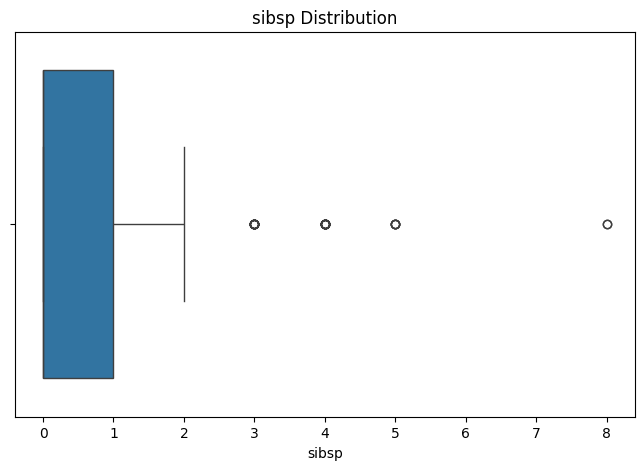

In [ ]:
# sibsp
plt.figure(figsize=(8,5))
sns.boxplot(x = tit['sibsp']).set(title='sibsp Distribution')
plt.show()

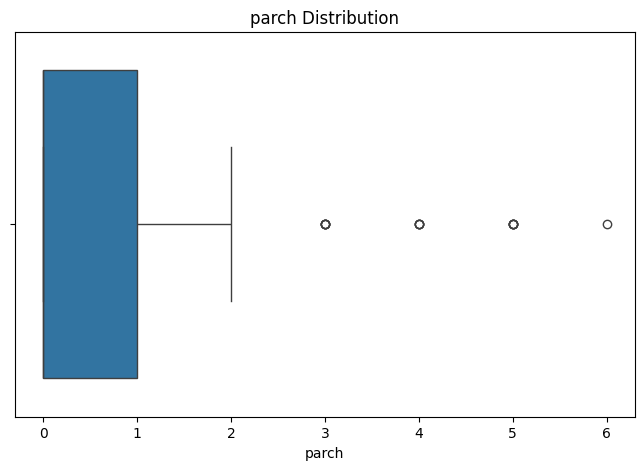

In [ ]:
# parch
plt.figure(figsize=(8,5))
sns.boxplot(x=tit['parch']).set(title='parch Distribution')
plt.show()

 **using zscore to detect outliers**

>A z-score indicates how many standard deviations a data point is from the mean of the dataset.

> How to determine z-score?
To find the z-score, subtract the mean from the quantity in question, and then divide by the standard deviation of the whole set





**Age Feature**

In [ ]:
# age
tit['age_zscore'] = zscore(tit['age'])
outliers = tit[(tit['age_zscore'] > 3) | (tit['age_zscore'] < -3)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_zscore
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,Cherbourg,no,True,3.010641
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,Cherbourg,no,True,3.010641
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,Southampton,yes,True,3.664831
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,Southampton,no,True,3.228704


using **bining way** to deal with outliers in **"age"** column

In [ ]:
tit['Age_binned'] = pd.cut(tit['age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young', 'Adult', 'Senior'])

# check resulsts
print(tit['Age_binned'].value_counts())

Age_binned
Young     346
Adult     231
Child     135
Senior     63
Name: count, dtype: int64


In [ ]:
# fare
tit['fare_zscore']= zscore(tit['fare'])
outliers = tit[(tit['fare_zscore'] > 3) | (tit['fare_zscore'] < -3)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_zscore,Age_binned,fare_zscore
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False,-0.769123,Young,4.355573
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False,-0.478372,Young,4.355573
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,Cherbourg,no,False,-0.405684,Young,4.060025
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True,0.393881,Adult,9.116066
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,Cherbourg,yes,False,1.484198,Adult,4.060025
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False,-0.841811,Child,4.343639
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False,-0.405684,Young,4.355573
377,0,1,male,27.0,0,2,211.5000,C,First,man,True,Cherbourg,no,False,-0.187621,Young,3.372273
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,Cherbourg,yes,True,0.902696,Adult,3.678241
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,False,2.501826,Senior,4.355573


Using **Replacing way** to deal with outliers in **fare** feature

In [ ]:
# Median for fare
median_fare = tit['fare'].median()
# Replace outliers
tit['fare'] = tit['fare'].apply(lambda x: median_fare if (x > (tit['fare'].mean() + 3 * tit['fare'].std())) or (x < (tit['fare'].mean() - 3 * tit['fare'].std())) else x)

sibsp feature

In [ ]:
# sibsp
tit['sibsp_zscore'] = zscore(tit['sibsp'])
outliers = tit[(tit['sibsp'] > 3) | (tit['sibsp'] < -3)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_zscore,Age_binned,fare_zscore,sibsp_zscore
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,Queenstown,no,False,-2.004815,Child,-0.109851,3.507138
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,Southampton,no,False,-1.641376,Child,0.091821,3.507138
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,Southampton,no,False,-1.350625,Child,0.229531,4.517559
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,Southampton,yes,False,-0.914498,Child,-0.514627,3.507138
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,Southampton,no,False,-0.987186,Child,0.229531,4.517559
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,Southampton,no,False,-2.004815,Child,-0.068801,3.507138
164,0,3,male,1.0,4,1,39.6875,S,Third,child,False,Southampton,no,False,-2.077503,Child,0.091821,3.507138
171,0,3,male,4.0,4,1,29.1250,Q,Third,child,False,Queenstown,no,False,-1.859439,Child,-0.109851,3.507138
182,0,3,male,9.0,4,2,31.3875,S,Third,child,False,Southampton,no,False,-1.496000,Child,-0.066653,3.507138
233,1,3,female,5.0,4,2,31.3875,S,Third,child,False,Southampton,yes,False,-1.786751,Child,-0.066653,3.507138


In [ ]:
# Replace the outliers with median value and apply it on dataset
median_sibsp = tit['sibsp'].median()
tit['sibsp'] = tit['sibsp'].apply(lambda x: median_sibsp if (x > (tit['sibsp'].mean() + 3 * tit['sibsp'].std())) or (x < (tit['sibsp'].mean() - 3 * tit['sibsp'].std())) else x)

parch feature

In [ ]:
tit['parch_zscore'] = zscore(tit['parch'])
outliers = tit[(tit['parch_zscore'] > 3) | (tit['parch_zscore'] < -3)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_zscore,Age_binned,fare_zscore,sibsp_zscore,parch_zscore
13,0,3,male,39.0,1.0,5,31.2750,S,Third,man,True,Southampton,no,False,0.684632,Adult,-0.068801,0.475876,5.451465
25,1,3,female,38.0,1.0,5,31.3875,S,Third,woman,False,Southampton,yes,False,0.611945,Adult,-0.066653,0.475876,5.451465
86,0,3,male,16.0,1.0,3,34.3750,S,Third,man,True,Southampton,no,False,-0.987186,Child,-0.009612,0.475876,3.070577
167,0,3,female,45.0,1.0,4,27.9000,S,Third,woman,False,Southampton,no,False,1.120759,Adult,-0.133240,0.475876,4.261021
360,0,3,male,40.0,1.0,4,27.9000,S,Third,man,True,Southampton,no,False,0.757320,Adult,-0.133240,0.475876,4.261021
437,1,2,female,24.0,2.0,3,18.7500,S,Second,woman,False,Southampton,yes,False,-0.405684,Young,-0.307943,1.486296,3.070577
438,0,1,male,64.0,1.0,4,15.9000,S,First,man,True,Southampton,no,False,2.501826,Senior,4.355573,0.475876,4.261021
567,0,3,female,29.0,0.0,4,21.0750,S,Third,woman,False,Southampton,no,False,-0.042245,Young,-0.263551,-0.534545,4.261021
610,0,3,female,39.0,1.0,5,31.2750,S,Third,woman,False,Southampton,no,False,0.684632,Adult,-0.068801,0.475876,5.451465
638,0,3,female,41.0,0.0,5,39.6875,S,Third,woman,False,Southampton,no,False,0.830008,Adult,0.091821,-0.534545,5.451465


In [ ]:
median_parch =tit['parch'].median()
# Replace the outliers with median value and apply it on dataset
tit['parch'] = tit['parch'].apply(lambda x: median_parch if (x > (tit['parch'].mean() + 3 * tit['parch'].std())) or (x < (tit['parch'].mean() - 3 * tit['parch'].std())) else x)

drop the columns contain zscore results

*   not remove age_binned column generated because i will use it in analsis



In [ ]:
tit.drop(columns=['age_zscore', 'fare_zscore', 'sibsp_zscore', 'parch_zscore'], inplace=True)

In [ ]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    object  
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    float64 
 5   parch        775 non-null    float64 
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    object  
 8   class        775 non-null    category
 9   who          775 non-null    object  
 10  adult_male   775 non-null    bool    
 11  embark_town  775 non-null    object  
 12  alive        775 non-null    object  
 13  alone        775 non-null    bool    
 14  Age_binned   775 non-null    category
dtypes: bool(2), category(2), float64(4), int64(2), object(5)
memory usage: 76.0+ KB


# **Analysis and make insights from the data**

> Create KPIs

> Answer questions using visuals





In [ ]:
tit.head().style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Age_binned
0,0,3,male,22.000000,1.000000,0.000000,7.250000,S,Third,man,True,Southampton,no,False,Young
1,1,1,female,38.000000,1.000000,0.000000,71.283300,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.000000,0.000000,0.000000,7.925000,S,Third,woman,False,Southampton,yes,True,Young
3,1,1,female,35.000000,1.000000,0.000000,53.100000,S,First,woman,False,Southampton,yes,False,Adult
5,0,3,male,28.000000,0.000000,0.000000,8.458300,Q,Third,man,True,Queenstown,no,True,Young


KPIs

In [ ]:
# Total Passengers
total_passengers = len(tit)
print("Total Passengers:", total_passengers)

Total Passengers: 775


In [ ]:
# number of males and femals
tit['sex'].value_counts()

,count
sex,
male,483
female,292


In [ ]:
# count people in each age category
age_group = tit['Age_binned'].value_counts()
age_group

,count
Age_binned,
Young,346
Adult,231
Child,135
Senior,63


In [ ]:
# display count of males and femals respect to age_binned
pass_grouped = tit.groupby('Age_binned')['sex'].value_counts()
pass_grouped

Age_binned  sex   
Child       male       68
            female     67
Young       male      222
            female    124
Adult       male      147
            female     84
Senior      male       46
            female     17
Name: count, dtype: int64

In [ ]:
# count people in each class
pass_class = tit['class'].value_counts()
pass_class

,count
class,
Third,401
First,210
Second,164


In [ ]:
# count males and femals in each class
pass_class_grouped = tit.groupby('class')['sex'].value_counts()
pass_class_grouped

class   sex   
First   male      117
        female     93
Second  male       92
        female     72
Third   male      274
        female    127
Name: count, dtype: int64

In [ ]:
# display count of passengers age_binned respect to class
pass_age_grouped = tit.groupby('pclass')['Age_binned'].value_counts()
pass_age_grouped

pclass  Age_binned
1       Adult          86
        Young          70
        Senior         38
        Child          16
2       Young          64
        Adult          57
        Child          28
        Senior         15
3       Young         212
        Child          91
        Adult          88
        Senior         10
Name: count, dtype: int64

In [ ]:
# Total price of tickets
total_price = tit['fare'].sum().round(2)
print("Total price of tickets:", total_price)

Total price of tickets: 21762.59


In [ ]:
# total price respect ot males and femals
tit.groupby('sex')['fare'].sum().round(2)

,fare
sex,
female,10571.78
male,11190.82


In [ ]:
tit.groupby('class')['fare'].sum().round(2)

,fare
class,
First,12723.62
Second,3589.84
Third,5449.13


In [ ]:
# Total price respect to pass type
tit.groupby('Age_binned')['fare'].sum().round(2)

,fare
Age_binned,
Child,3815.98
Young,7801.29
Adult,7628.26
Senior,2517.06


In [ ]:
# count of passengers respect to each town
tit['embark_town'].value_counts()

,count
embark_town,
Southampton,562
Cherbourg,155
Queenstown,58


In [ ]:
# count people still alive respect to dead
# still alive >> yes
# dead >> no
tit['alive'].value_counts()

,count
alive,
no,455
yes,320


In [ ]:
# count passengers still alive or not respect to ticket type
pass_alive_class = tit.groupby('class')['alive'].value_counts()
pass_alive_class

class   alive
First   yes      133
        no        77
Second  yes       83
        no        81
Third   no       297
        yes      104
Name: count, dtype: int64

In [ ]:
# count passengers respect to age_binned
pass_type_alive = tit.groupby('Age_binned')['alive'].value_counts()
pass_type_alive

Age_binned  alive
Child       yes       69
            no        66
Young       no       216
            yes      130
Adult       no       132
            yes       99
Senior      no        41
            yes       22
Name: count, dtype: int64

In [ ]:
# Count of passengers alone respect to have familes
tit['alone'].value_counts()

,count
alone,
True,437
False,338


In [ ]:
# count people alone or not respect to ticket type
pass_alone_class = tit.groupby('class')['alone'].value_counts()
pass_alone_class

class   alone
First   False    107
        True     103
Second  True      86
        False     78
Third   True     248
        False    153
Name: count, dtype: int64

In [ ]:
# count passengers respect to number of brothers and sisters
# 0 >> single
# 1 >> has one brother or sister on the same ship ..etc
tit['sibsp'].value_counts()

,count
sibsp,
0.0,533
1.0,201
2.0,27
3.0,14


In [ ]:
tit['parch'].value_counts()

,count
parch,
0.0,586
1.0,114
2.0,75


# **Data Visualization**

show correlation between features

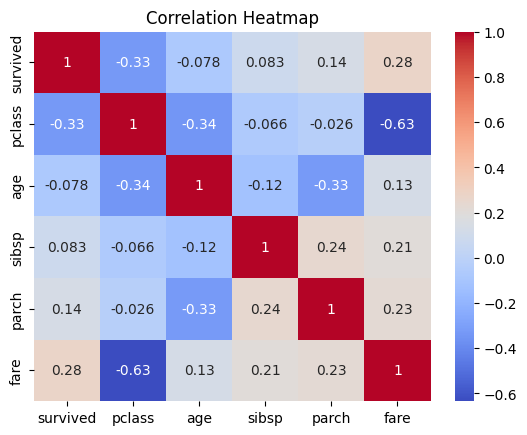

In [ ]:
corr = tit.select_dtypes(include=np.number).corr() # To select only numerical columns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

What is the age distribution of passengers on the Titanic?

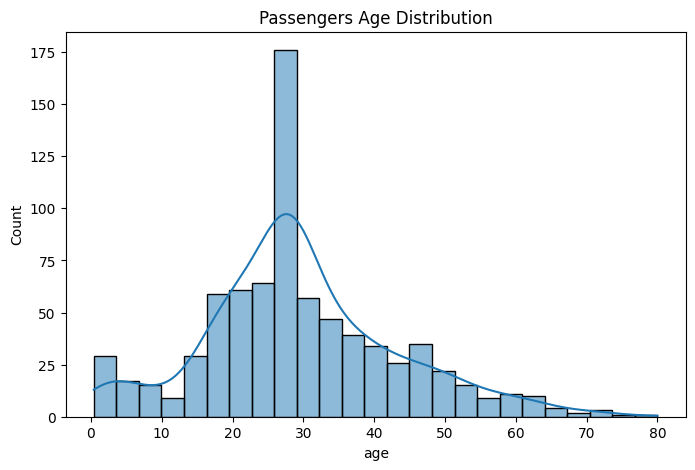

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(tit['age'], kde=True).set(title='Passengers Age Distribution')
plt.show()

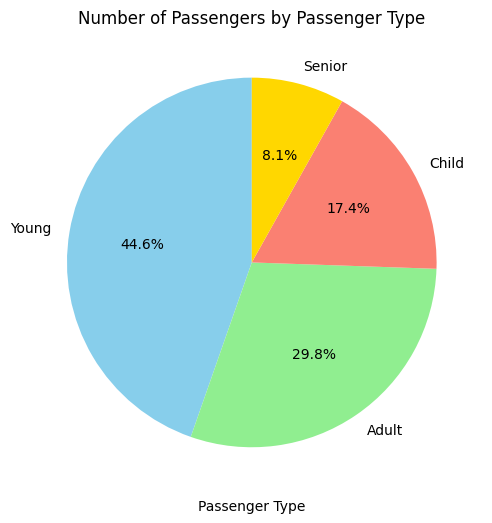

In [ ]:
count_pass = tit['Age_binned'].value_counts() # Get counts for each age category

# pie chart to display the percentage of each type
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(count_pass, labels=count_pass.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon','gold'])

plt.title('Number of Passengers by Passenger Type')
plt.xlabel('Passenger Type')
plt.show()

What was the ratio of passengers who survived versus those who didn't?

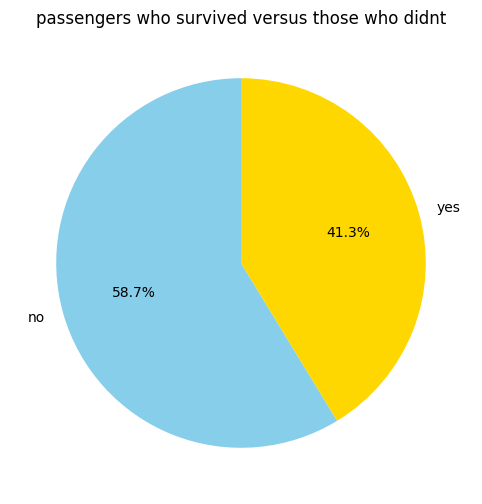

In [ ]:
# yes >> servived
# no >> dead
pass_alive = tit['alive'].value_counts() # count pass by category

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(pass_alive, labels=pass_alive.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])

plt.title('passengers who survived versus those who didnt')
plt.show()

What is the percentage of passengers from each class on the ship?

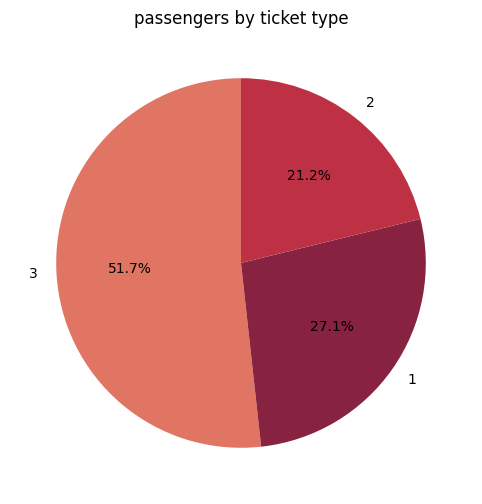

In [98]:
pass_class = tit['pclass'].value_counts() # count pass by category

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(pass_class, labels=pass_class.index, autopct='%1.1f%%', startangle=90, colors=['#E17564', '#872341', '#BE3144'])

plt.title('passengers by ticket type')
plt.show()

What is the relationship between age and survival rate?

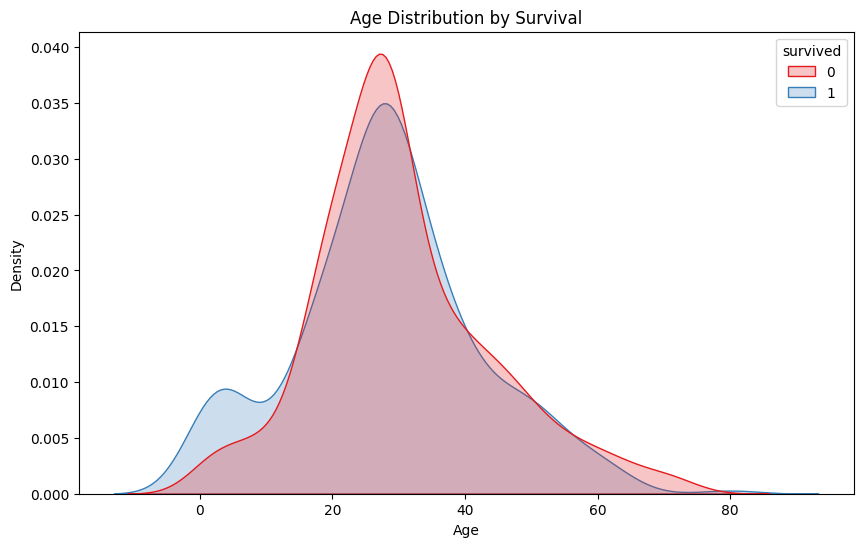

In [120]:
# KDE plot of age for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tit, x='age', hue='survived', common_norm=False, fill=True, palette='Set1')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

What is Fare Distribution by gender?

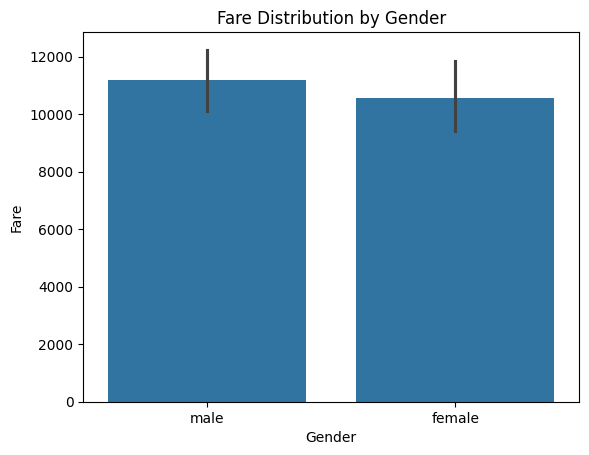

In [127]:
sns.barplot(x='sex', y='fare', data=tit, estimator=sum)
plt.title('Fare Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Fare')
plt.show()

What is the distribution of passengers based on gender (male/female)?

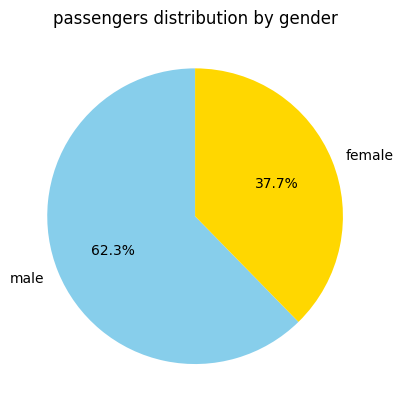

In [130]:
pass_type = tit['sex'].value_counts() # count pass by category

plt.pie(pass_type, labels=pass_type.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'gold'])
plt.title('passengers distribution by gender')
plt.show()

What percentage of passengers survived based on passenger class and gender?

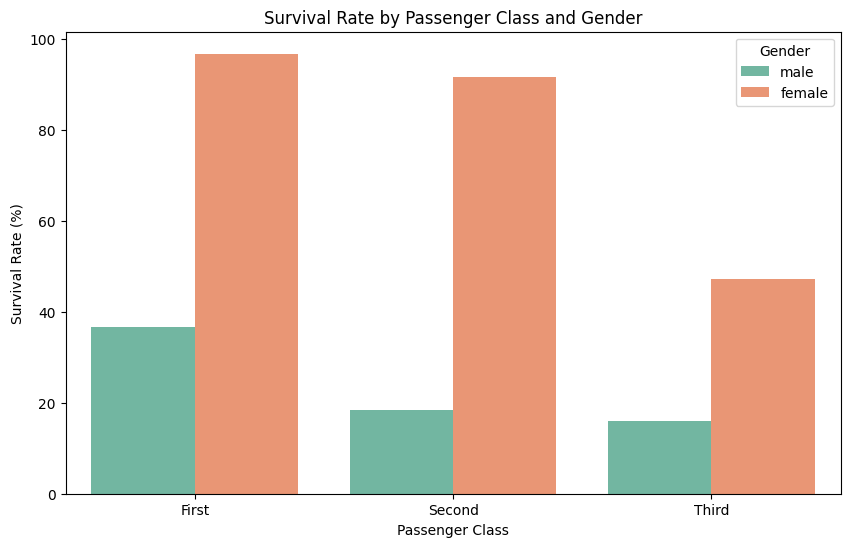

In [137]:
# average survived
pass_class_rate = tit.groupby(['class','sex'])['survived'].mean() # average survived
# % of survived
tit['survival_rate'] = tit.apply(lambda row: pass_class_rate.loc[(row['class'], row['sex'])] * 100, axis=1)
# bar visual
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y=tit['survival_rate'], hue='sex', data=tit, palette='Set2')

plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Gender')
plt.show()



What is the distribution of passengers based on the port"town" of embarkation?

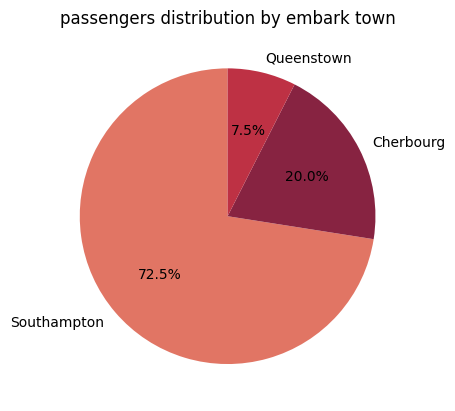

In [140]:
pass_embark = tit['embark_town'].value_counts() # count pass by category

plt.pie(pass_embark, labels=pass_embark.index, autopct='%1.1f%%', startangle=90, colors=['#E17564', '#872341', '#BE3144'])
plt.title('passengers distribution by embark town')
plt.show()

What percentage of passengers survived based on port of embarkation and passenger category?

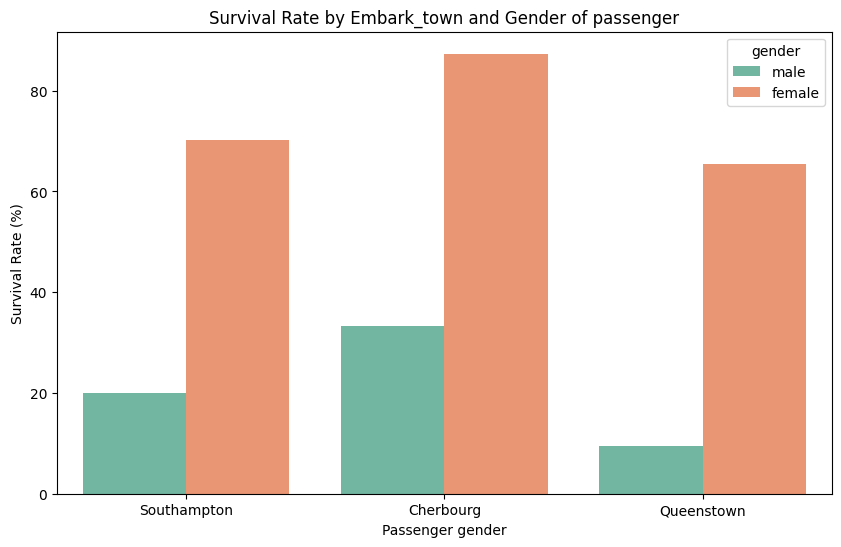

In [144]:
# average survived
pass_class_rate = tit.groupby(['embark_town','sex'])['survived'].mean() # average survived
# % of survived
tit['survival_rate'] = tit.apply(lambda row: pass_class_rate.loc[(row['embark_town'], row['sex'])] * 100, axis=1)
# bar visual
plt.figure(figsize=(10, 6))
sns.barplot(x='embark_town', y=tit['survival_rate'], hue='sex', data=tit, palette='Set2')

plt.title('Survival Rate by Embark_town and Gender of passenger')
plt.xlabel('Passenger gender')
plt.ylabel('Survival Rate (%)')
plt.legend(title='gender')
plt.show()

**Thanks for my effort and your watch**